# Import libraries, define plot functions, and build GrOpt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from k_utils import get_bval, get_eddy_curves, get_maxwell
import seaborn as sns

import sys, os
sys.path.insert(0, os.path.abspath('../'))

import gropt

%matplotlib inline

sns.set()
sns.set_context("talk")


def plot_grad(G,dt,title):
    SR = np.gradient(G)
    t = np.arange(G.size)*dt*1e3
    plt.figure()
    ax1 = plt.subplot(121)
    ax1.grid(1)
    plt.plot(t,G,linewidth = 5)
    plt.ylabel("Gradient (mT/m)",fontsize=24)
    plt.xlabel("Time (ms)",fontsize=24)
    plt.title(title,fontsize=32)

    ax2 = plt.subplot(122)
    ax2.grid(1)
    plt.plot(t,SR,linewidth = 5)
    plt.ylabel("Slew Rate (T/m/s)",fontsize=24)
    plt.xlabel("Time (ms)",fontsize=24)
    plt.title(title,fontsize=32)
    for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
        label.set_fontsize(24)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(24)        

    fig = plt.gcf()
    fig.set_size_inches(18.5, 5.25)
    plt.show()
    
#     ax2 = plt.subplot(122)
#     ax2.grid(1)
#     GAM = 267.52e3 # [rad/(mT x sec)]
#     tINV = int(np.floor(TE/dt/1.0e3/2.0))
#     INV = np.ones(G.size)
#     INV[tINV:] = -1
#     tt = np.arange(G.size)*dt*1e3
#     conPhase = np.cumsum(1000*INV*(G**2)*GAM*dt/1.0e3)
#     plt.plot(tt,conPhase/np.max(conPhase),linewidth = 5)
#     plt.ylabel("Concominant Phase",fontsize=24)
#     plt.xlabel("Time (ms)",fontsize=24)
#     plt.title(title,fontsize=32)
#     for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
#         label.set_fontsize(24)
#     for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
#         label.set_fontsize(24)        

    fig = plt.gcf()
    fig.set_size_inches(18.5, 5.25)
    plt.show()    
    
    return None


def plot_eddy(G,dt,eddy_lam):

    plt.figure()
    ax1 = plt.subplot(111)
    ax1.grid(1)
    plt.axhline(color='0.5', ls=':')
    
    if np.max(eddy_lam) > 0:
        if not (np.array(eddy_lam).shape):
            plt.axvline(eddy_lam*1e3, color='r', ls='--')
        else:
            for i in np.array(eddy_lam):
                plt.axvline(i*1e3, color='r', ls='--')
        
    all_lam, all_e0, all_e1 = get_eddy_curves(G, dt, 200, 200)
    all_e0 = 100*np.array(all_e0)
    if all_e0.mean() < 0:
        all_e0 *= -1
    plt.plot(all_lam, all_e0,linewidth = 5)
    plt.ylabel("Eddy Spectrum (A.U.)",fontsize=24)
    plt.xlabel("Time Constant (ms)",fontsize=24)
    for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
        label.set_fontsize(24)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 5.25)
    plt.show() 
    
    return None


# CODE-M1

Done with func and in .pyx
outsize[0] 148
Done with func and in .pyx set G_return


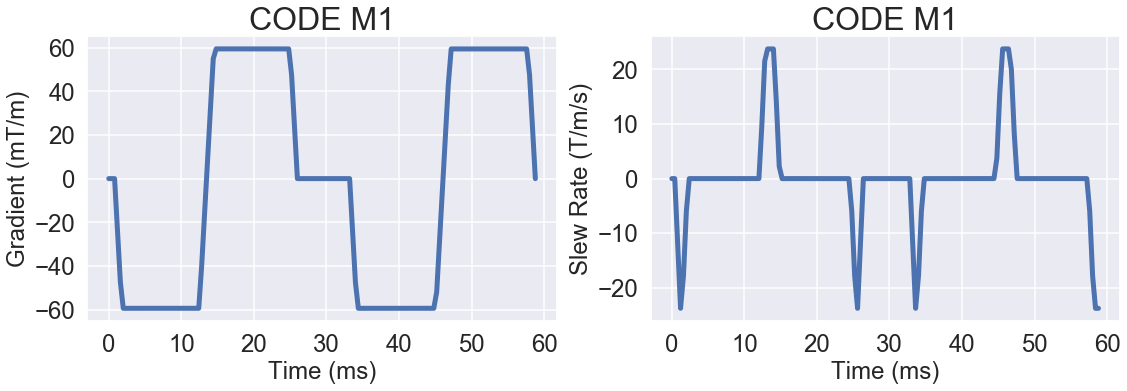

<Figure size 1332x378 with 0 Axes>

Diffusion b-value = 604 s/mm^2
TE = 59.0 ms
Tprep = 59.2 ms


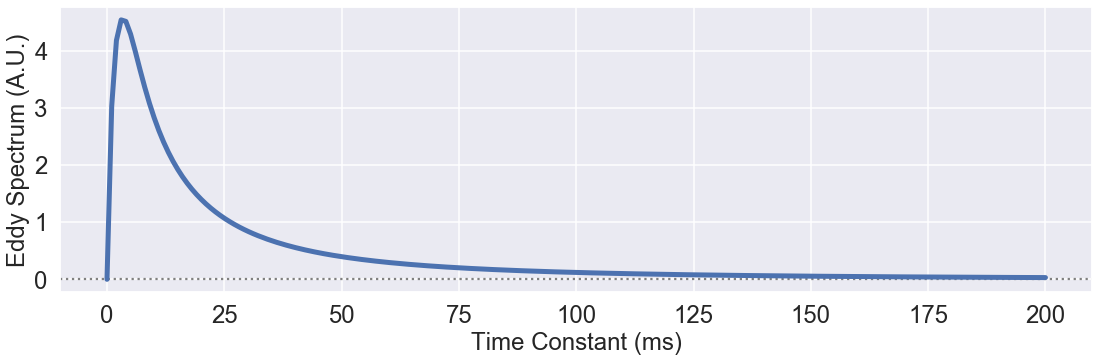

In [2]:
dt = 400e-6        # Gradient sampling rate (seconds)
T_90 = 0.5e-3      # Duration of the excitation pulse (seconds)
T_180 = 6.64e-3    # Duration of the refocusing pulse (seconds)
T_readout = 0e-3   # Duration of the EPI readout from start to TE (seconds)
T_pre = 0e-3       # Duration of gradients before the excitation pulse (seconds)
TE = 59e-3         # Desired echo time (seconds) ** change this to change the b-value **
moment_order = 1   # Flag for moment-nulling constraint: 0: M0=0; 1: M0=M1=0; 2: M0=M1=M2=0
gmax = .06         # Maximum available gradient amplitude (T/m)
smax = 60          # Maximum available gradient slew rate (T/m/second)
eddy_lam = -1e3    # Eddy current time constant that you want to null (seconds) ** set to negative to ignore **
maxwell_tol = -0.1 # Concomitant field (Maxwell) constraint ** set to negative to ignore **

G = gropt.diff_pre_eddy(dt, T_90, T_180, T_readout, T_pre, TE, moment_order, gmax, smax, eddy_lam, maxwell_tol)

bval = get_bval(G, dt, TE, T_pre)
plot_grad(G*1e3,dt,'CODE M1')
print('Diffusion b-value = %d s/mm^2' % (bval))
print('TE = %0.1f ms' % (TE*1e3))
print('Tprep = %0.1f ms' % (G.size*dt*1e3))

plot_eddy(G,dt,eddy_lam)
G_0 = G.copy()
TE_0 = TE
Tprep_0 = G.size*dt*1e3

# EN-CODE-M1

Done with func and in .pyx
outsize[0] 243
Done with func and in .pyx set G_return


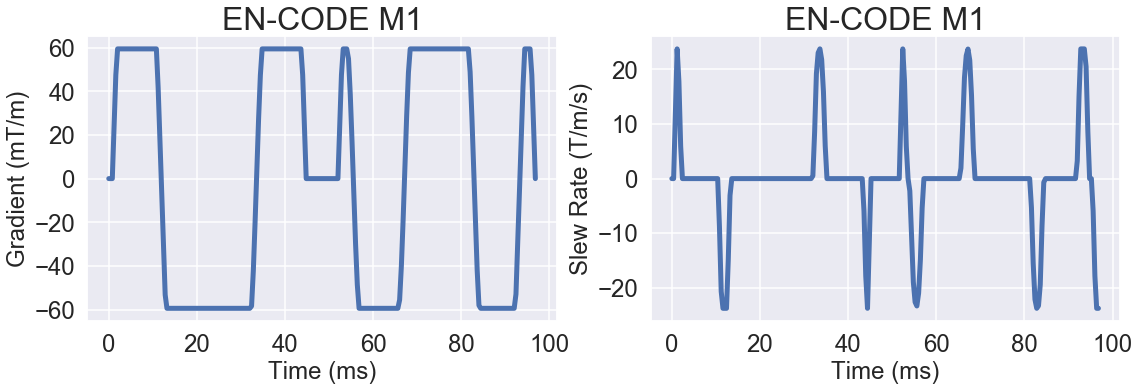

<Figure size 1332x378 with 0 Axes>

Diffusion b-value = 596 s/mm^2
TE = 97.0 ms
Tprep = 97.2 ms


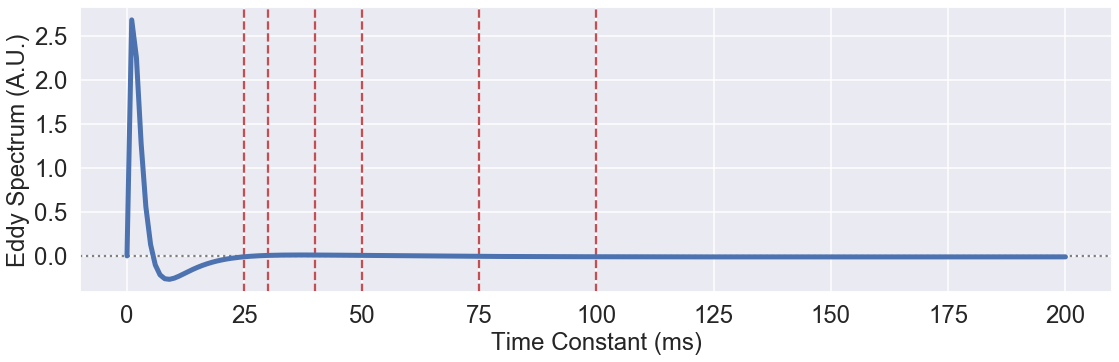

In [3]:
dt = 400e-6        # Gradient sampling rate (seconds)
T_90 = 0.5e-3      # Duration of the excitation pulse (seconds)
T_180 = 6.64e-3    # Duration of the refocusing pulse (seconds)
T_readout = 0e-3   # Duration of the EPI readout from start to TE (seconds)
T_pre = 0e-3       # Duration of gradients before the excitation pulse (seconds)
TE = 97e-3         # Desired echo time (seconds) ** change this to change the b-value **
moment_order = 1   # Flag for moment-nulling constraint: 0: M0=0; 1: M0=M1=0; 2: M0=M1=M2=0
gmax = .06         # Maximum available gradient amplitude (T/m)
smax = 60          # Maximum available gradient slew rate (T/m/second)
eddy_lam = [100e-3, 75e-3, 50e-3, 40e-3, 30e-3, 25e-3]   
                   # Eddy current time constant that you want to null (seconds) ** set to negative to ignore **
maxwell_tol = -0.1 # Concomitant field (Maxwell) constraint ** set to negative to ignore **

G = gropt.diff_pre_eddy(dt, T_90, T_180, T_readout, T_pre, TE, moment_order, gmax, smax, eddy_lam, maxwell_tol)

bval = get_bval(G, dt, TE, T_pre)
plot_grad(G*1e3,dt,'EN-CODE M1')
print('Diffusion b-value = %d s/mm^2' % (bval))
print('TE = %0.1f ms' % (TE*1e3))
print('Tprep = %0.1f ms' % (G.size*dt*1e3))

plot_eddy(G,dt,eddy_lam)
G_1 = G.copy()
TE_1 = TE
Tprep_1 = G.size*dt*1e3

# preEN-CODE-M1

Done with func and in .pyx
outsize[0] 284
Done with func and in .pyx set G_return


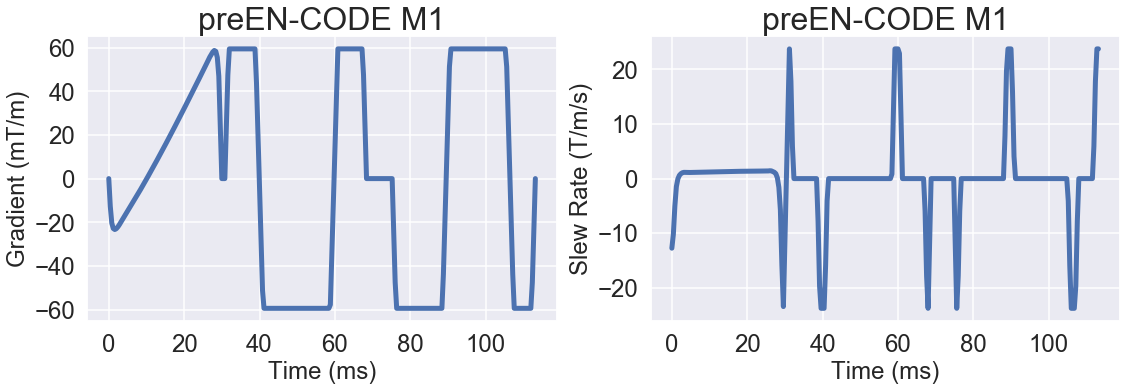

<Figure size 1332x378 with 0 Axes>

Diffusion b-value = 605 s/mm^2
TE = 83.5 ms
Tprep = 113.6 ms


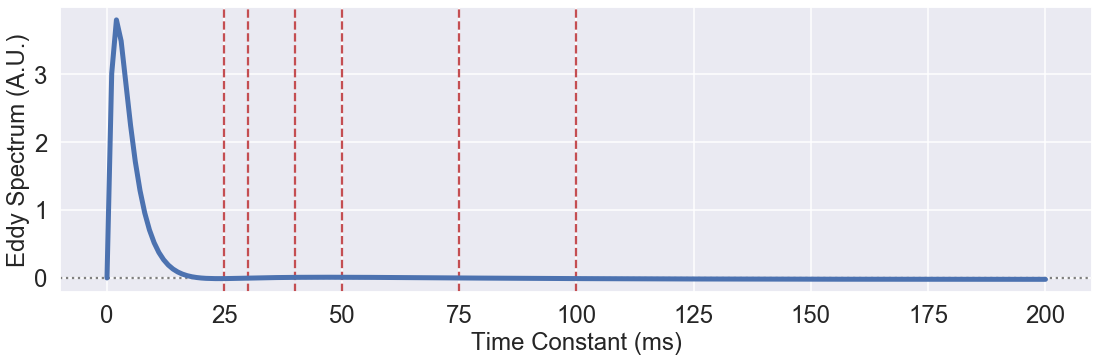

In [4]:
dt = 400e-6        # Gradient sampling rate (seconds)
T_90 = 0.5e-3      # Duration of the excitation pulse (seconds)
T_180 = 6.64e-3    # Duration of the refocusing pulse (seconds)
T_readout = 0e-3   # Duration of the EPI readout from start to TE (seconds)
T_pre = 30e-3      # Duration of gradients before the excitation pulse (seconds)
TE = 83.5e-3       # Desired echo time (seconds) ** change this to change the b-value **
moment_order = 1   # Flag for moment-nulling constraint: 0: M0=0; 1: M0=M1=0; 2: M0=M1=M2=0
gmax = .06         # Maximum available gradient amplitude (T/m)
smax = 60          # Maximum available gradient slew rate (T/m/second)
eddy_lam = [100e-3, 75e-3, 50e-3, 40e-3, 30e-3, 25e-3]   
                   # Eddy current time constant that you want to null (seconds) ** set to negative to ignore **
maxwell_tol = -0.01# Concomitant field (Maxwell) constraint ** set to negative to ignore **

G = gropt.diff_pre_eddy(dt, T_90, T_180, T_readout, T_pre, TE, moment_order, gmax, smax, eddy_lam, maxwell_tol)

bval = get_bval(G, dt, TE, T_pre)
plot_grad(G*1e3,dt,'preEN-CODE M1')
print('Diffusion b-value = %d s/mm^2' % (bval))
print('TE = %0.1f ms' % (TE*1e3))
print('Tprep = %0.1f ms' % (G.size*dt*1e3))

plot_eddy(G,dt,eddy_lam)
G_2 = G.copy()
TE_2 = TE
Tprep_2 = G.size*dt*1e3

# preEN-CODE-M1 Maxwell

Done with func and in .pyx
outsize[0] 284
Done with func and in .pyx set G_return


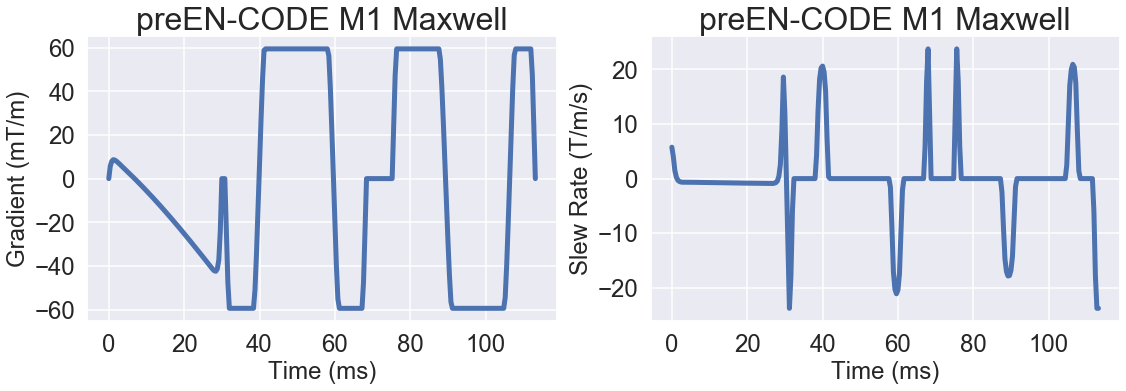

<Figure size 1332x378 with 0 Axes>

Diffusion b-value = 598 s/mm^2
TE = 83.5 ms
Tprep = 113.6 ms


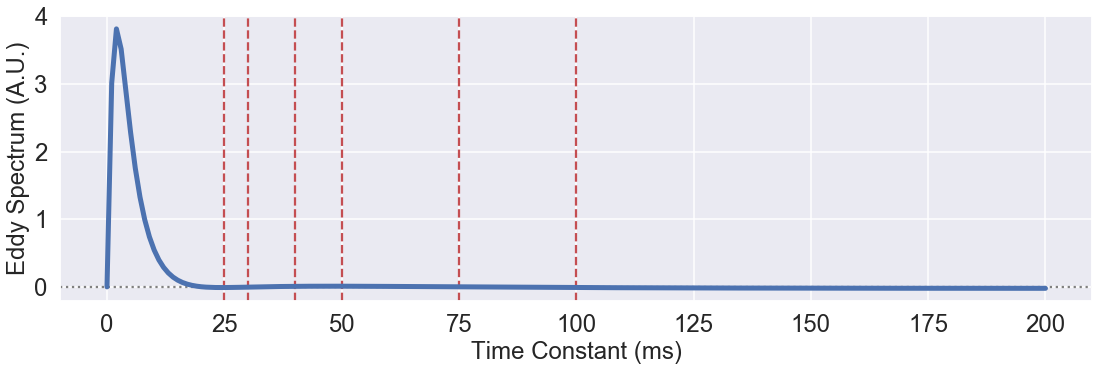

In [5]:
dt = 400e-6        # Gradient sampling rate (seconds)
T_90 = 0.5e-3      # Duration of the excitation pulse (seconds)
T_180 = 6.64e-3    # Duration of the refocusing pulse (seconds)
T_readout = 0e-3   # Duration of the EPI readout from start to TE (seconds)
T_pre = 30e-3      # Duration of gradients before the excitation pulse (seconds)
TE = 83.5e-3       # Desired echo time (seconds) ** change this to change the b-value **
moment_order = 1   # Flag for moment-nulling constraint: 0: M0=0; 1: M0=M1=0; 2: M0=M1=M2=0
gmax = .06         # Maximum available gradient amplitude (T/m)
smax = 60          # Maximum available gradient slew rate (T/m/second)
eddy_lam = [100e-3, 75e-3, 50e-3, 40e-3, 30e-3, 25e-3]   
                   # Eddy current time constant that you want to null (seconds) ** set to negative to ignore **
maxwell_tol = 0.001# Concomitant field (Maxwell) constraint ** set to negative to ignore **

G = gropt.diff_pre_eddy(dt, T_90, T_180, T_readout, T_pre, TE, moment_order, gmax, smax, eddy_lam, maxwell_tol)

bval = get_bval(G, dt, TE, T_pre)
plot_grad(G*1e3,dt,'preEN-CODE M1 Maxwell')
print('Diffusion b-value = %d s/mm^2' % (bval))
print('TE = %0.1f ms' % (TE*1e3))
print('Tprep = %0.1f ms' % (G.size*dt*1e3))

plot_eddy(G,dt,eddy_lam)
G_3 = G.copy()
TE_3 = TE
Tprep_3 = G.size*dt*1e3

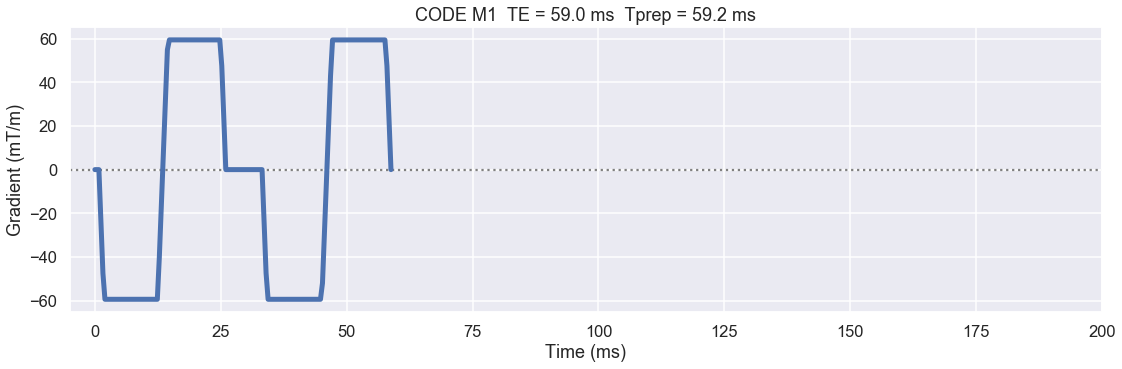

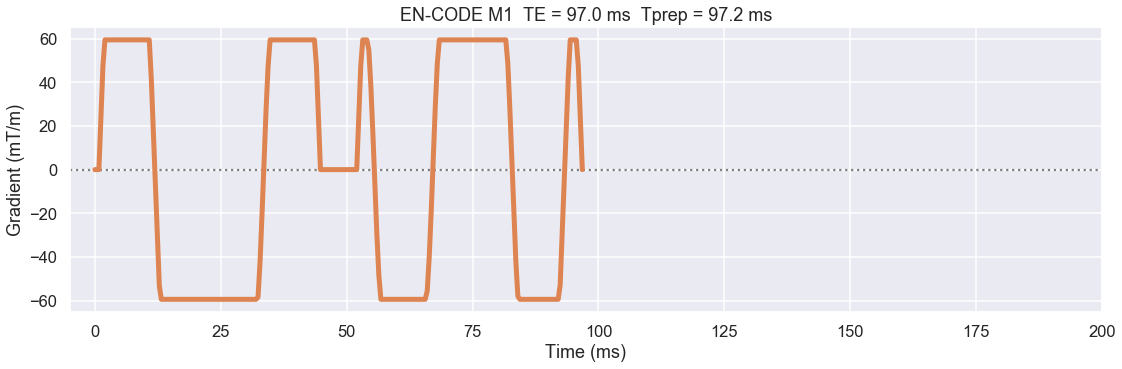

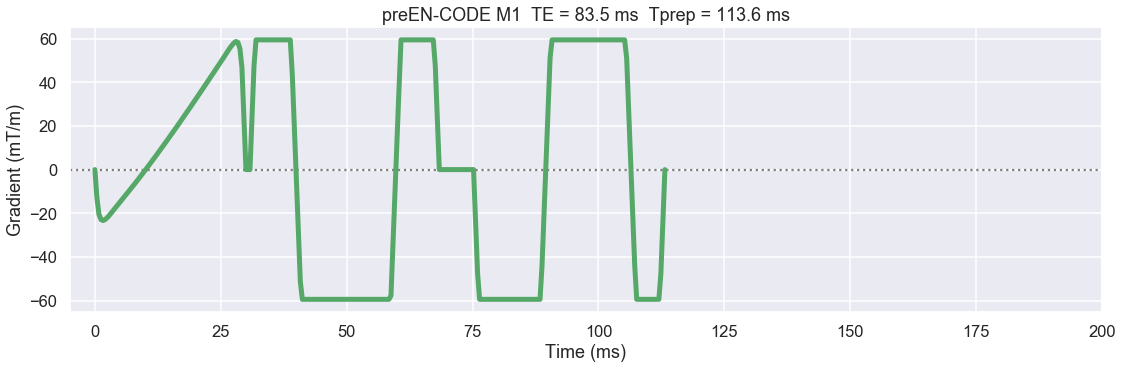

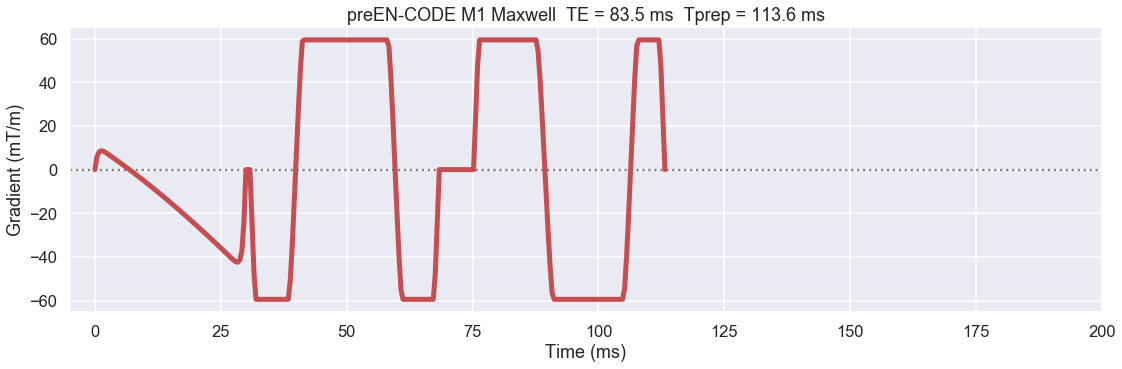

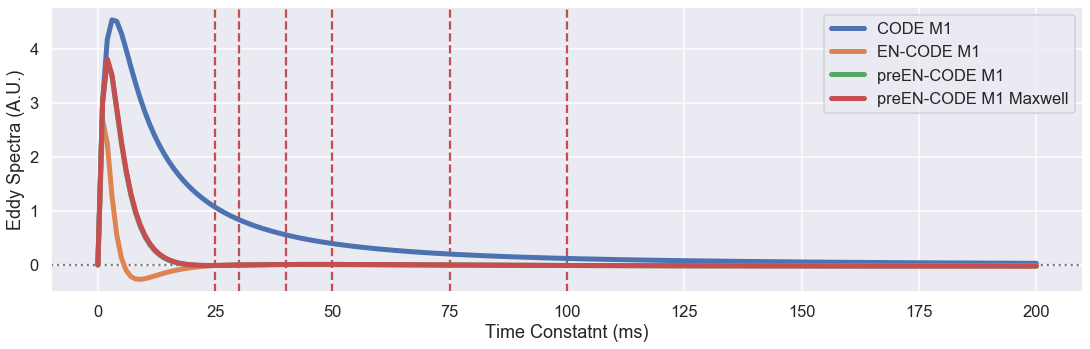

In [6]:
cycler = plt.rcParams['axes.prop_cycle'].by_key()['color']
all_G = [G_0, G_1, G_2, G_3]
TE = [TE_0, TE_1, TE_2, TE_3]
Prep = [Tprep_0, Tprep_1, Tprep_2, Tprep_3]
names = ['CODE M1', 'EN-CODE M1', 'preEN-CODE M1', 'preEN-CODE M1 Maxwell']

for i in range(np.size(all_G)):
    plt.figure()
    plt.axhline(color='0.5', ls=':')
    plt.plot(np.arange(all_G[i].size)*dt*1e3, all_G[i]*1e3, color = cycler[i],linewidth = 5)
    plt.title('{:}  TE = {:.1f} ms  Tprep = {:.1f} ms'.format(names[i], TE[i]*1e3, Prep[i]))
    plt.ylabel("Gradient (mT/m)")
    plt.xlabel("Time (ms)")
    fig = plt.gcf()
    plt.xlim([-5, 200])
    fig.set_size_inches(18.5, 5.25)
    plt.show()
    #plt.savefig('wave_{:d}.png'.format(i),dpi=300,bbox_inches='tight',facecolor='w', pad_inches=0)
    
    
plt.figure()
plt.axhline(color='0.5', ls=':')
plt.axvline(25, color='r', ls='--')
plt.axvline(30, color='r', ls='--')
plt.axvline(40, color='r', ls='--')
plt.axvline(50, color='r', ls='--')
plt.axvline(75, color='r', ls='--')
plt.axvline(100, color='r', ls='--')

for i in range(np.size(all_G)):
    all_lam, all_e0, all_e1 = get_eddy_curves(all_G[i], dt, 200, 200)
    all_e0 = 100*np.array(all_e0)     
    
    if all_e0.mean() < 0:
        all_e0 *= -1

    plt.plot(all_lam, all_e0, color=cycler[i], label = names[i],linewidth = 5)
    plt.ylabel("Eddy Spectra (A.U.)")
    plt.xlabel("Time Constatnt (ms)")
    
plt.legend(prop={'size': 24})
plt.legend(loc='upper right')
fig = plt.gcf()
fig.set_size_inches(18.5, 5.25)
plt.show()    
#plt.savefig('eddy.png',dpi=300,bbox_inches='tight',facecolor='w', pad_inches=0)